In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X,y = load_iris(return_X_y=True)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75)

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)

In [19]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9736842105263158

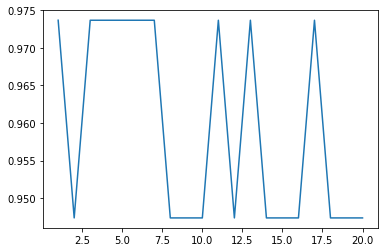

In [20]:
scores = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))
plt.plot(range(1,21),scores)
plt.show()

In [21]:
scores

[0.9736842105263158,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315]

In [22]:
mean_scores = []
for j in range(0,10):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    scores = []
    for i in range(1,21):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        scores.append(knn.score(X_test,y_test))
    mean_scores.append(scores)

--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------
--------------------------------------


In [27]:
import numpy as np
mean_scores = np.array(mean_scores)

In [36]:
mean_scores.mean(axis=0)

array([0.96315789, 0.95      , 0.96578947, 0.96052632, 0.97105263,
       0.96578947, 0.97368421, 0.97368421, 0.97105263, 0.97105263,
       0.97631579, 0.97631579, 0.97894737, 0.97631579, 0.97368421,
       0.96052632, 0.96842105, 0.95      , 0.96052632, 0.95      ])

In [37]:
def dist(a,b):
    total = 0
    for i,j in zip(a,b):
        total = total + (i-j)**2
    return(total**0.5)

In [52]:
a=[70,190,60000]
b=[80,50,70000]
print(dist(a,b))

10000.984951493529


In [95]:
import pandas as pd
frutas = pd.read_csv('fruit_data_with_colors.txt',sep='\t')

In [96]:
X = frutas[['mass','height','width','color_score']]
y = frutas['fruit_label']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
l = [1,2,3,4,1000]
l = [(x-min(l))/(max(l)-min(l)) for x in l]
print(l)

[0.0, 0.001001001001001001, 0.002002002002002002, 0.003003003003003003, 1.0]


In [66]:
(7-1)/(5-1)

1.5

In [90]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [91]:
knn = KNeighborsClassifier(n_neighbors=3)

In [92]:
mm = MinMaxScaler()
X_train_scaled = mm.fit_transform(X_train)
X_test_scaled = mm.transform(X_test)
# mm.fit(X_train)
# X_train_scaled = mm.transform(X_train)
# X_test_scaled = mm.transform(X_test)

In [93]:
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9473684210526315

In [94]:
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.9473684210526315

<h1> Overfitting

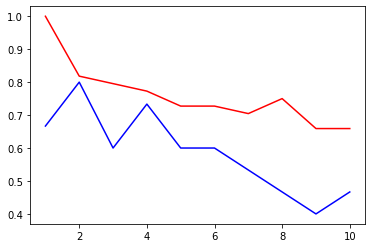

In [97]:
frutas = pd.read_csv('fruit_data_with_colors.txt',sep='\t')
X = frutas[['mass','height','width','color_score']]
y = frutas['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X,y)
train = []
test = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train.append(knn.score(X_train,y_train))
    test.append(knn.score(X_test,y_test))
plt.plot(range(1,11),train,'r-')
plt.plot(range(1,11),test,'b-')
plt.show()

# KNN regressão

In [106]:
X = [[1000],[2000],[1700],[1300]]
y_regressao = [3000,6000,5400,3900]
y_classificacao = [0,1,1,0]

In [99]:
def dist(a,b):
    total = 0
    for i,j in zip(a,b):
        total = total + (i-j)**2
    return(total**0.5)

In [102]:
sal = [1800]
for x in X:
    print("A distancia entre",sal,"e",x,"é de",dist(sal,x))

A distancia entre [1800] e [1000] é de 800.0
A distancia entre [1800] e [2000] é de 200.0
A distancia entre [1800] e [1700] é de 100.0
A distancia entre [1800] e [1300] é de 500.0


In [104]:
(6000+5400+3900)/3

5100.0

In [110]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X,y_regressao)

KNeighborsRegressor(n_neighbors=2)

In [111]:
knn.predict([[1800]])

array([5700.])

# Aplicação do KNN para regressão em conjunto de dados

In [112]:
from sklearn.datasets import load_boston

In [114]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [115]:
X,y = load_boston(return_X_y=True)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
mm = MinMaxScaler()
mm.fit(X_train)
X_train_scaled = mm.transform(X_train)
X_test_scaled = mm.transform(X_test)

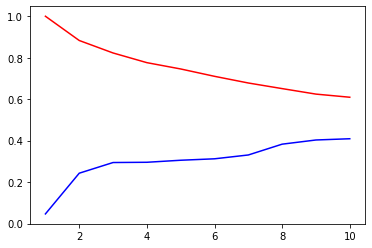

In [117]:
train = []
test = []
for i in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    train.append(knn.score(X_train,y_train))
    test.append(knn.score(X_test,y_test))
plt.plot(range(1,11),train,'r-')
plt.plot(range(1,11),test,'b-')
plt.show()

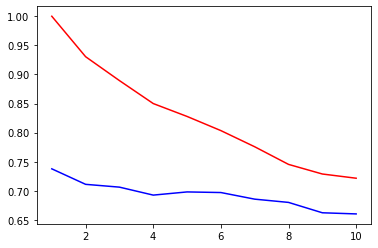

In [118]:
train = []
test = []
for i in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    train.append(knn.score(X_train_scaled,y_train))
    test.append(knn.score(X_test_scaled,y_test))
plt.plot(range(1,11),train,'r-')
plt.plot(range(1,11),test,'b-')
plt.show()

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_boston

In [122]:
X,y = load_boston(return_X_y=True)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
mm = MinMaxScaler()
mm.fit(X_train)
X_train_scaled = mm.transform(X_train)
X_test_scaled = mm.transform(X_test)

In [124]:
lr = LinearRegression()

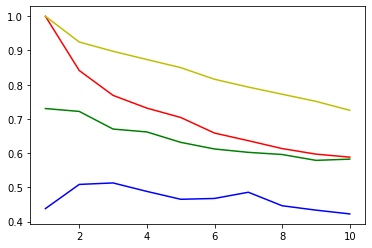

In [127]:
train = []
test = []
train_scaled = []
test_scaled = []
for i in range(1,11):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    train.append(knn.score(X_train,y_train))
    test.append(knn.score(X_test,y_test))
    knn.fit(X_train_scaled,y_train)
    train_scaled.append(knn.score(X_train_scaled,y_train))
    test_scaled.append(knn.score(X_test_scaled,y_test))
plt.plot(range(1,11),train,'r-')
plt.plot(range(1,11),test,'b-')
plt.plot(range(1,11),train_scaled,'y-')
plt.plot(range(1,11),test_scaled,'g-')
plt.show()

In [128]:
lr.fit(X_train,y_train)
print(lr.score(X_test,y_test))
lr.fit(X_train_scaled,y_train)
print(lr.score(X_test_scaled,y_test))

0.685414130869725
0.6854141308697246
